In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

In [19]:
data_wine = pd.read_csv('C:/Users/Michela/Downloads/archive (1)/winequality-red.csv')

In [20]:
data_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [21]:
data_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Quality of wine')

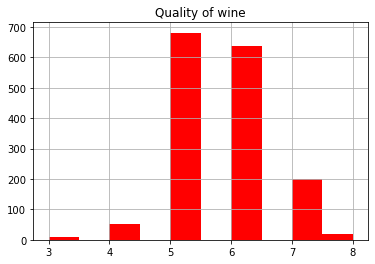

In [23]:
data_wine['quality'].hist(color='red')
plt.title('Quality of wine')

In [24]:
quality = data_wine['quality'].value_counts()
quality

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [25]:
# prepare data for fitting: if wine has quality over 5 it is a good wine; if it has belove it is a bad wine
# changing the values to Boolean operators (True or False)

In [26]:
good_wine = data_wine['quality']>5
good_wine

0       False
1       False
2       False
3        True
4       False
        ...  
1594    False
1595     True
1596     True
1597    False
1598     True
Name: quality, Length: 1599, dtype: bool

In [27]:
import numpy as np
wine_rate = np.array(data_wine['quality']>5)
mapping = {True: 'Good wine', False: 'Bad wine'}
y = np.vectorize(mapping.get)(wine_rate)
y

array(['Bad wine', 'Bad wine', 'Bad wine', ..., 'Good wine', 'Bad wine',
       'Good wine'], dtype='<U9')

In [28]:
X_variables =data_wine.iloc[:,:-1]

X_variables

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


## Train and split 

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_variables_train,X_variables_test,y_train,y_test=train_test_split(X_variables,y,random_state=42,test_size=0.2)

In [31]:
from sklearn.svm import SVC
ensamble = VotingClassifier(estimators=[
    ('mnb', MultinomialNB()),
    ('svc', SVC()),
    ('rf', RandomForestClassifier())
])

In [32]:
pipe = Pipeline([
    ('encoder', None), 
    ('classifier', ensamble),
])

In [33]:
cls = GridSearchCV(
    pipe, 
    {
        'encoder': [
            None
        ],
        'classifier__mnb__alpha': [0.1, 1, 2],
        'classifier__svc__C': [0.1, 1, 10],
        'classifier__svc__class_weight': ['balanced'],
        'classifier__rf__n_estimators': [10, 100],
        'classifier__rf__criterion': ['gini', 'entropy'],
    }, 
    cv=5, 
    scoring='f1_macro'
)

In [34]:
scaler_X_variables_train=scaler.fit_transform(X_variables_train)

scaler_X_variables_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [35]:
scaler_X_variables_test=scaler.transform(X_variables_test)

scaler_X_variables_test

array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01, ...,
        -4.65392578e-01, -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01, ...,
         5.08915214e-01, -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01, ...,
        -2.05577167e-01,  1.83329452e+00, -4.92358280e-01],
       ...,
       [-1.37449586e-02,  3.87494284e-01, -1.15015218e-01, ...,
        -1.04997725e+00, -7.44964886e-01, -5.87389780e-01],
       [ 2.76350785e-01, -1.45397070e+00,  6.01568807e-01, ...,
        -1.04997725e+00,  1.71749571e-01,  7.43051230e-01],
       [ 4.50408230e-01,  1.30822677e+00, -1.18989125e+00, ...,
        -1.40623314e-01, -6.87670232e-01, -6.82421281e-01]])

In [36]:
cls.fit(X_variables_train, y_train)
cls.best_params_

{'classifier__mnb__alpha': 2,
 'classifier__rf__criterion': 'gini',
 'classifier__rf__n_estimators': 100,
 'classifier__svc__C': 10,
 'classifier__svc__class_weight': 'balanced',
 'encoder': None}

In [37]:
print('Validation score', cls.best_score_)
print('Test score', cls.score(X_variables_test, y_test))

Validation score 0.7458958821874069
Test score 0.7672727272727273


In [39]:
pickle.dump(cls, open('model.pkl', 'wb'))

## Building SVM Classifier

In [28]:
from sklearn.svm import SVC

svc_classifier = SVC(C=1.0, 
              kernel='rbf', 
              degree=3, 
              gamma='auto', 
              coef0=0.0, shrinking=True, 
              probability=False, 
              tol=0.001, cache_size=200, 
              class_weight=None, 
              verbose=False, max_iter=-1, 
              decision_function_shape='ovr', 
              break_ties=False,random_state=None)

svc_classifier.fit(scaler_X_variables_train,good_wine_train)

SVC(gamma='auto')

In [29]:
svc_classifier_predictions=svc_classifier.predict(scaler_X_variables_test)

In [30]:
c=confusion_matrix(good_wine_test,svc_classifier_predictions)
a=accuracy_score(good_wine_test,svc_classifier_predictions)
p=precision_score(good_wine_test,svc_classifier_predictions)
r=recall_score(good_wine_test,svc_classifier_predictions)

In [32]:
print('Accuracy', a*100)
print('Precision', p*100)
print('Recall score', r*100)

Accuracy 77.1875
Precision 81.17647058823529
Recall score 77.09497206703911


In [34]:
print('Confusion Matrix\n', c)

Confusion Matrix
 [[109  32]
 [ 41 138]]
